# Task 4: Analysing building density
**The task is to link the IÖR-Monitor indicator "Building density in reference area" with the synthetic SOEP Structural Dataset of Berlin, for two years: 2014 and 2021**

## Load functions from SoRa R package
This steps are currently required to load all R functions from /R/ directory. In future, the SoRa R package will be installed directly.

In [1]:
# load R functions from SoRa R Package
path <- "/home/jovyan/R/"
sora_functions  <- dir(path)
for (i in sora_functions) {
  source(paste0(path, i))
}

## Check your changed SORA_API_KEY 
- the environment variable from .Renviron file


In [2]:
#check environment variable for SORA_API_KEY
Sys.getenv("SORA_API_KEY")

[1] "9448b1d9c90db35d8975c24f71c60ee0c2855ee6eaf92eea2a32c23f094331d4de6579c54e51b223658f6769939e64d1380b30f9805bfc9316bef9a7a3ef6217"

## Load, explore and prepare input survey data
- SOEP structural dataset are synthetic coordinates with a similar spatial distribution in comparison to the origin coordinates of the survey
- SOEP structural dataset has ID and syear columns, which bot are needed to create a  unique ID

In [3]:
## load data
path_data <- "/home/jovyan/data/"
## data Berlin
berlin <- read.csv(paste0(path_data, "berlin.csv"))

## subset for coordinates of 2014
berlin_2014 <- berlin[berlin$syear == 2014, ]
berlin_2014 <- sora_assemble_id(berlin_2014, id_col = c("id", "syear"))

## subset for coordinates of 2021
berlin_2021 <- berlin[berlin$syear == 2021, ]
berlin_2021 <- sora_assemble_id(berlin_2021, id_col = c("id", "syear"))

Explore the input datasets

In [4]:
head(berlin_2014)

id,x,y
<chr>,<dbl>,<dbl>
56644_2014,32804612,5816741
24834_2014,32786222,5835026
75534_2014,32813596,5812816
37249_2014,32808706,5815318
44472_2014,32804799,5842586
46950_2014,32813696,5829137


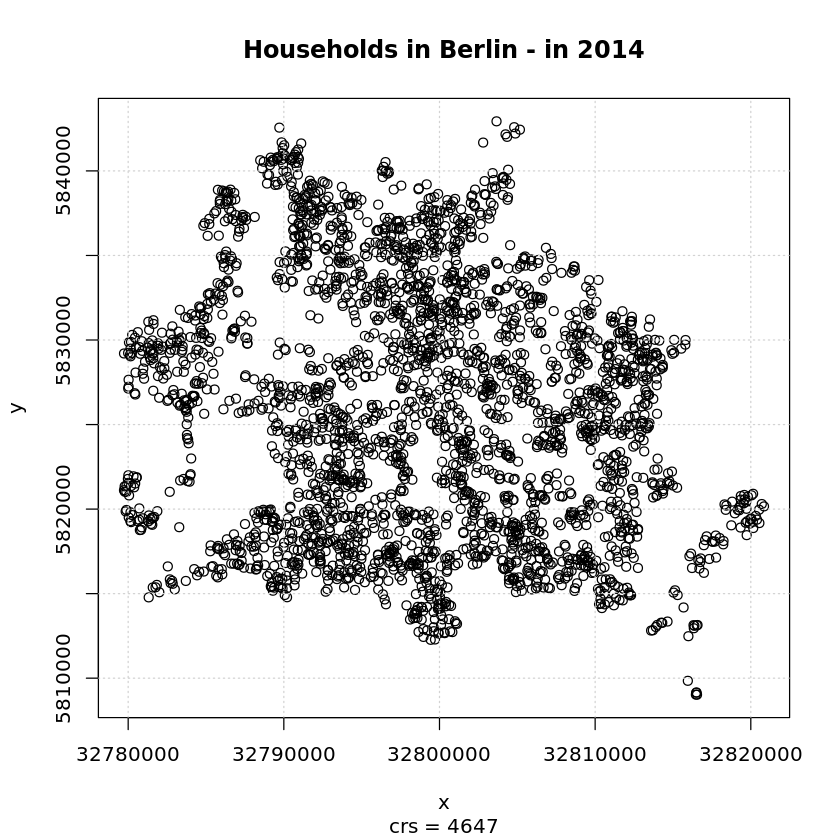

In [5]:
## plot berlin in 2014
plot(berlin_2014$x, berlin_2014$y, 
     xlab = "x", ylab = "y",
     main = "Households in Berlin - in 2014",
     sub = "crs = 4647")
grid()

In [6]:
head(berlin_2021)

id,x,y
<chr>,<dbl>,<dbl>
56644_2021,32808411,5832856
24834_2021,32786222,5835026
75534_2021,32813596,5812816
44472_2021,32804799,5842586
46950_2021,32813696,5829137
91637_2021,32806451,5817091


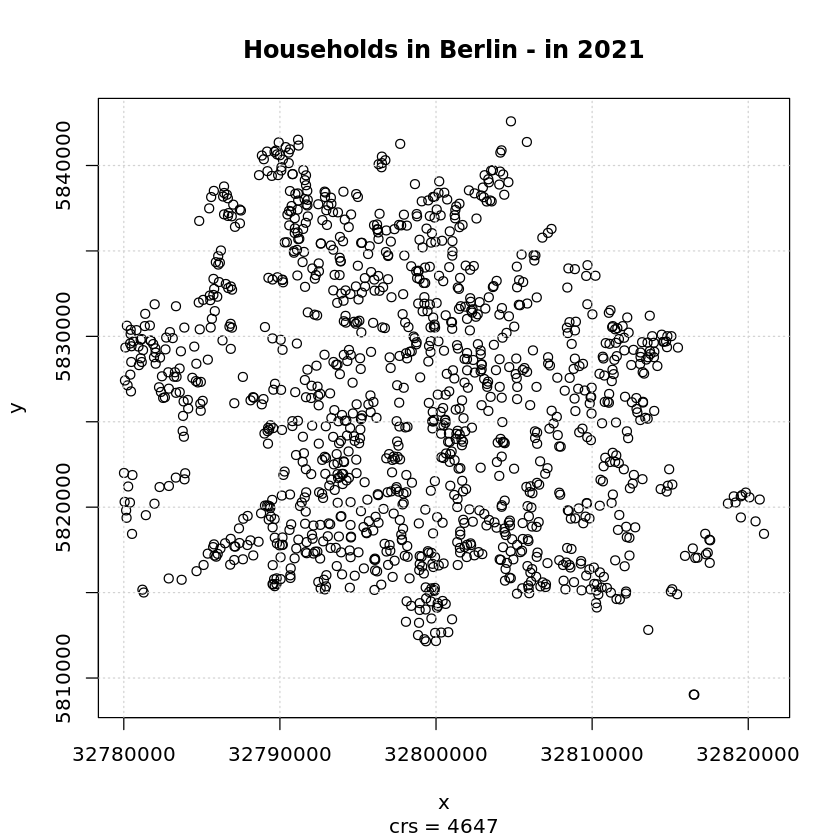

In [7]:
## plot berlin in 2021
plot(berlin_2021$x, berlin_2021$y, 
     xlab = "x", ylab = "y",
     main = "Households in Berlin - in 2021",
     sub = "crs = 4647")
grid()

In [8]:
## check if sora is available
## script stops here, if there is a problem!

stopifnot(sora_available())

### Linking for 2014
prepare and execute linking job for year 2014

In [9]:
sora_data_2014 <- sora_custom(.data = berlin_2014, crs = 4647)

In [10]:
# define geospatial dataset for linkage
spat_data_2014 <- sora_spatial(id = "ioer-monitor-g01dg-2014-1000m")

**Please define linking with calculation of Mean, Minimum, Maximum, Standard derivation within a square of 2,5 km length**

In [11]:
linking_2014 <- sora_linking(
  method = "aggregate_attribute",
  selection_area = "square",
  length = 2500,
  output = c("mean", "min", "max", "sd")
)

Start the linking job

In [12]:
job_id_2014 <- sora_request(dataset = sora_data_2014, link_to = spat_data_2014, method = linking_2014)

→ The provided coordinates have unique identifiers and are in valid format.
→ The requested sora-provided geospatial dataset is existing.
→ Chosen geospatial dataset: Building density in reference area (2014, 1000m
  Raster) from IOER-Monitor (IOER)
→ Chosen linkage: Aggregate attribute within square on raster with numeric
  field - Geocoded Dataset: Vector: Point | Geospatial Dataset: Raster -
  numeric
→ The requested linkage is plausible and fits to the chosen geospatial dataset.
  All provided parameter are valid including its values.
→ All required permissions for accessing the data are available.
→ Total number of provided coordinates: 2955 (valid: 2955, having null values:
  0).
→ Number of coordinates located within the bounding box of geospatial dataset:
  2955 (outside: 0).
→ All required external services are available.


### Get results

Check if linking job is already finished

In [13]:
## check, if your current linking job is done
sora_job_done(job_id_2014)

[1] TRUE

Or check the job status of all your requested linking jobs

In [14]:
## check status of all your started linking jobs
sora_jobs()

job_id,created_at,status
<chr>,<dttm>,<chr>
IOER-27f3d62b-645e-48e3-9fc8-f2a65dab8338,2025-06-27 14:39:19,SUCCESSFUL
IOER-3b530028-4f24-4495-9c70-7b2c63fce9e4,2025-06-27 14:12:51,SUCCESSFUL
IOER-e5bb2fce-6aa1-4d6f-816e-95b74db761bc,2025-06-27 14:03:39,SUCCESSFUL
IOER-f3555b01-d49d-4967-a491-86f13375c524,2025-06-27 14:01:11,SUCCESSFUL
IOER-404b72ca-fb78-45f6-a52d-28015822fab8,2025-06-27 13:35:35,SUCCESSFUL
IOER-5e2bab40-c2af-4cb4-bca5-c92eb6ab7982,2025-06-27 13:35:18,SUCCESSFUL
IOER-dd92aa8a-ddad-4b1f-862c-dd9fa3973cdd,2025-06-27 12:58:17,SUCCESSFUL
IOER-65c1f03b-a206-464b-9c71-d934da3cc9bf,2025-06-27 12:55:08,SUCCESSFUL
IOER-6c479c87-768b-4c7e-8b79-7009a326a9a3,2025-06-27 11:16:55,SUCCESSFUL


**If your linking job is finished**, then you can get the result data

In [15]:
## get results
sora_calls <- sora_jobs()
job_id_2014 <- sora_calls$job_id[1]

if (sora_job_done(job_id_2014)){
  results_2014 <- sora_results(job_id = job_id_2014)
  results_2014 <- sora_split_id(results_2014, out_col = c("hid", "syear"))
  head(results_2014)
}


→ The requested linkage was successfully executed.


hid,syear,area,min,max,mean,sd,count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
56644,2014,6250000,8,1894,1028.5000,669.2465,6
24834,2014,6250000,34,1014,392.6667,363.6051,9
75534,2014,6250000,120,1622,1034.8333,531.3832,6
37249,2014,6250000,9,1913,857.5556,577.7228,9
44472,2014,6250000,41,997,624.7500,355.1453,4
46950,2014,6250000,1302,1665,1492.5000,131.8038,4


### Linking for 2021
prepare and execute linking job for year 2021
- hint: 
    - to determine the correct linking parameter, you can either use the online web-interface of the datapicker
    - or read the error messages (after starting a linking job), to get an idea which values are valid

In [16]:
sora_data_2021 <- sora_custom(.data = berlin_2021, crs = 4647)

**Please search for geospatial dataset ID which es similar to first linking for 2014. But now, please use data of 2021**

In [17]:
# define geospatial dataset for linkage
spat_data_2021 <- sora_spatial(id = "ioer-monitor-g01dg-2021-1000m")

**Please define linking with calculation of Mean, Minimum, Maximum, Standard derivation within a square of 2,5 km length**

In [18]:
linking_2021 <- sora_linking(
  method = "aggregate_attribute",
  selection_area = "square",
  length = 2500,
  output = c("mean", "min", "max", "sd")
)

In [19]:
job_id_2021 <- sora_request(dataset = sora_data_2021, link_to = spat_data_2021, method = linking_2021)

→ The provided coordinates have unique identifiers and are in valid format.
→ The requested sora-provided geospatial dataset is existing.
→ Chosen geospatial dataset: Building density in reference area (2021, 1000m
  Raster) from IOER-Monitor (IOER)
→ Chosen linkage: Aggregate attribute within square on raster with numeric
  field - Geocoded Dataset: Vector: Point | Geospatial Dataset: Raster -
  numeric
→ The requested linkage is plausible and fits to the chosen geospatial dataset.
  All provided parameter are valid including its values.
→ All required permissions for accessing the data are available.
→ Total number of provided coordinates: 1188 (valid: 1188, having null values:
  0).
→ Number of coordinates located within the bounding box of geospatial dataset:
  1188 (outside: 0).
→ All required external services are available.


### Get results

In [20]:
## check, if your current linking job is done
sora_job_done(job_id_2021)

[1] TRUE

In [21]:
## check status of all your started linking jobs
sora_jobs()

job_id,created_at,status
<chr>,<dttm>,<chr>
IOER-a3086004-1d50-4051-aef3-15da9b7613ce,2025-06-27 14:40:52,SUCCESSFUL
IOER-27f3d62b-645e-48e3-9fc8-f2a65dab8338,2025-06-27 14:39:19,SUCCESSFUL
IOER-3b530028-4f24-4495-9c70-7b2c63fce9e4,2025-06-27 14:12:51,SUCCESSFUL
IOER-e5bb2fce-6aa1-4d6f-816e-95b74db761bc,2025-06-27 14:03:39,SUCCESSFUL
IOER-f3555b01-d49d-4967-a491-86f13375c524,2025-06-27 14:01:11,SUCCESSFUL
IOER-404b72ca-fb78-45f6-a52d-28015822fab8,2025-06-27 13:35:35,SUCCESSFUL
IOER-5e2bab40-c2af-4cb4-bca5-c92eb6ab7982,2025-06-27 13:35:18,SUCCESSFUL
IOER-dd92aa8a-ddad-4b1f-862c-dd9fa3973cdd,2025-06-27 12:58:17,SUCCESSFUL
IOER-65c1f03b-a206-464b-9c71-d934da3cc9bf,2025-06-27 12:55:08,SUCCESSFUL


In [22]:
## get results
sora_calls <- sora_jobs()
job_id_2021 <- sora_calls$job_id[1]

if (sora_job_done(job_id_2021)){
  results_2021 <- sora_results(job_id = job_id_2021)
  results_2021 <- sora_split_id(results_2021, out_col = c("hid", "syear"))
  head(results_2021)
}


→ The requested linkage was successfully executed.


hid,syear,area,min,max,mean,sd,count
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
56644,2021,6250000,93,445,247.500,119.5990,6
24834,2021,6250000,81,1120,442.000,397.9989,9
75534,2021,6250000,139,1607,1051.333,520.1022,6
44472,2021,6250000,40,1064,653.750,378.0346,4
46950,2021,6250000,1483,1764,1644.500,122.7365,4
91637,2021,6250000,310,1783,1225.000,460.4097,9


### Analyses
- for both years (2014 and 2021) we have synthetic SOEP Structural Dataset coordinates, we linked now with geospatial dataset
- e.g. we could compare the linked values of both years
- **in the future**:
    - you could request a Data Use Contract with SOEP to get SOEPcore (without coordinates) + SOEP Structural Dataset (synthetic coordinates with similar spatial distribution) to execute your own test linking jobs from home (Public mode in SoRa)
    - you could apply for a research stay in Berlin using the secure room of SOEP to link the origin coordinates of SOEP with SOEPcore. Offering the best data for spatial linking (Private mode in SoRa)

In [23]:
## find only id which exist in both subsets '2014' and '2021'
unique_id <- c(results_2014$hid, results_2021$hid)
unique_id <- unique_id[which(duplicated(unique_id) == TRUE)]

In [24]:
## select data for year 2014
analyse_id <- which(is.element(results_2014$hid, unique_id) == TRUE)
analyse_results_2014 <- results_2014[analyse_id,]

In [25]:
## select data for year 2021
analyse_id <- which(is.element(results_2021$hid, unique_id) == TRUE)
analyse_results_2021 <- results_2021[analyse_id,]

In [26]:
## order both datasets by hid
analyse_results_2014 <- analyse_results_2014[order(analyse_results_2014$hid),]
analyse_results_2021 <- analyse_results_2021[order(analyse_results_2021$hid),]

,hid,syear_2014,area_2014,min_2014,max_2014,mean_2014,sd_2014,count_2014,syear_2021,area_2021,min_2021,max_2021,mean_2021,sd_2021,count_2021,diff_mean
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,10624,2014,6250000,650,1483,1216.5000,336.7822,4,2021,6250000,646,1565,1275.0000,373.4320,4,-58.50000
2,10734,2014,6250000,175,904,665.7500,289.3461,4,2021,6250000,183,963,702.7500,316.8409,4,-37.00000
3,10764,2014,6250000,652,1392,923.5000,303.4745,4,2021,6250000,380,1002,698.0000,191.2790,6,225.50000
4,10812,2014,6250000,70,662,271.0000,233.8664,4,2021,6250000,78,720,383.5000,288.1159,4,-112.50000
5,10881,2014,6250000,330,1723,1164.1667,497.7213,6,2021,6250000,344,1858,1341.1667,531.5579,6,-177.00004
6,11212,2014,6250000,0,1521,743.6667,594.4101,9,2021,6250000,0,1613,790.7778,625.6955,9,-47.11108


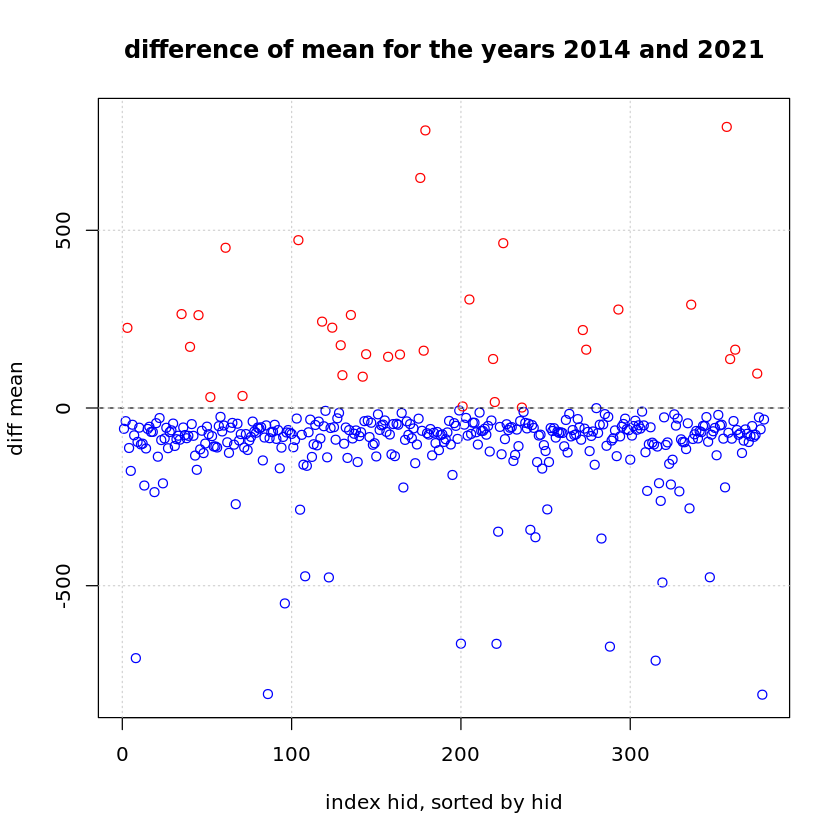

In [27]:
## plot difference
diff_mean <- analyse_results_2014$mean - analyse_results_2021$mean
data_diff <- merge(results_2014, results_2021, by = "hid")
data_diff <- data_diff[order(data_diff$hid),]
data_diff$diff_mean <- diff_mean
names(data_diff) <- gsub(".x", "_2014", names(data_diff), fixed = TRUE)
names(data_diff) <- gsub(".y", "_2021", names(data_diff), fixed = TRUE)

color_blue <- which(diff_mean < 0)
use_color <- rep("red", length(diff_mean))
use_color[color_blue] <- "blue"
range_y <- max(abs(diff_mean))
plot(diff_mean, col = use_color,
    main = "difference of mean for the years 2014 and 2021",
    xlab = "index hid, sorted by hid",
    ylab = "diff mean",
    ylim = c((range_y * -1), range_y))
abline(h = 0, lty = 2)
grid()
head(data_diff)

We are looking at the building density for the two years 2014 and 2021. In the plot of the differences, you can see that the building density for the majority of households in the same area has increased for the year 2021. On average across the entire city, the building density should therefore have increased.